# Sensitivity Analysis

In [1]:
import numpy as np

In [2]:
from lbuc import vec_to_numpy, mat_to_numpy

In [3]:
y0 = np.array([4.5, 1.5])

In [4]:
R.<x,y> = QQ[]
odes = vector([-y, x])

In [5]:
import sympy
t_ = sympy.var('_')

In [6]:
list(odes)

[-y, x]

In [7]:
f = vec_to_numpy(R, odes)
f(0, np.array([1, 2]))

[-2, 1]

In [8]:
jac = mat_to_numpy(R, jacobian(odes, R.gens()))
jac(0, np.array([1, 2]))

array([[ 0, -1],
       [ 1,  0]])

In [9]:
from scipy.integrate import solve_ivp

In [10]:
sln = solve_ivp(f, (0, 10), y0, method='LSODA', jac=jac, vectorized=True,
                events=[(lambda t, x: x[0])],
                dense_output=True)
sln

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 128
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7fde1ab3d050>
   status: 0
  success: True
        t: array([ 0.        ,  0.01054209,  0.02108418,  0.13608572,  0.25108726,
        0.3660888 ,  0.64557237,  0.92505595,  1.20453953,  1.37031421,
        1.5360889 ,  1.70186358,  1.86763826,  1.93769171,  2.00774515,
        2.0777986 ,  2.3625439 ,  2.64728921,  2.93203452,  3.21677982,
        3.50152513,  3.78627044,  4.07101575,  4.3014447 ,  4.53187366,
        4.76230262,  4.99273158,  5.07426596,  5.15580034,  5.23733472,
        5.52313162,  5.80892851,  6.0947254 ,  6.3805223 ,  6.4573511 ,
        6.5341799 ,  6.6110087 ,  6.89046806,  7.16992742,  7.44938678,
        7.72884614,  7.92116269,  8.11347923,  8.30579578,  8.49811233,
        8.61228097,  8.7264496 ,  8.84061824,  9.11839163,  9.14472335,
        9.17105508,  9.1973868 ,  9.223

In [11]:
from itertools import cycle

In [12]:
zip(sln.t_events[0], cycle([0]))

[(1.249257269985202, 0), (4.391176875509009, 0), (7.532966619222182, 0)]

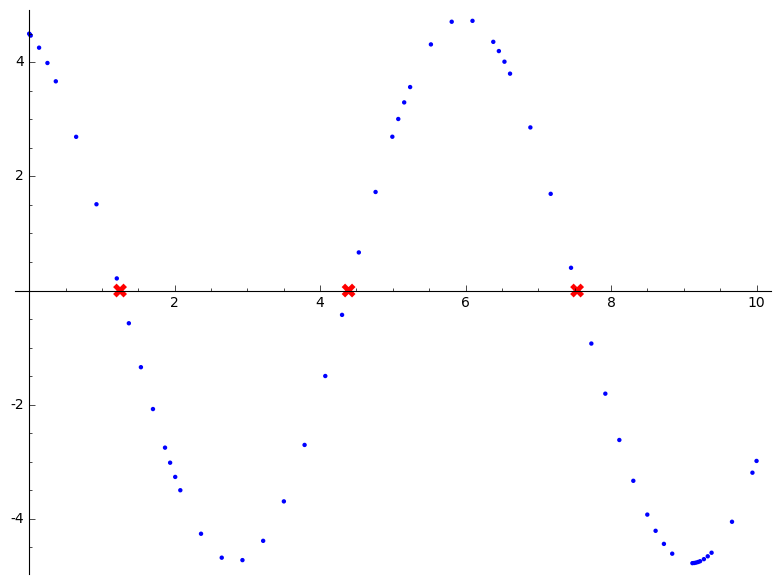

In [13]:
points(zip(sln.t, sln.y[0, :]))\
+ points(zip(sln.t_events[0], cycle([0])),
         color='red', marker='X', size=100)

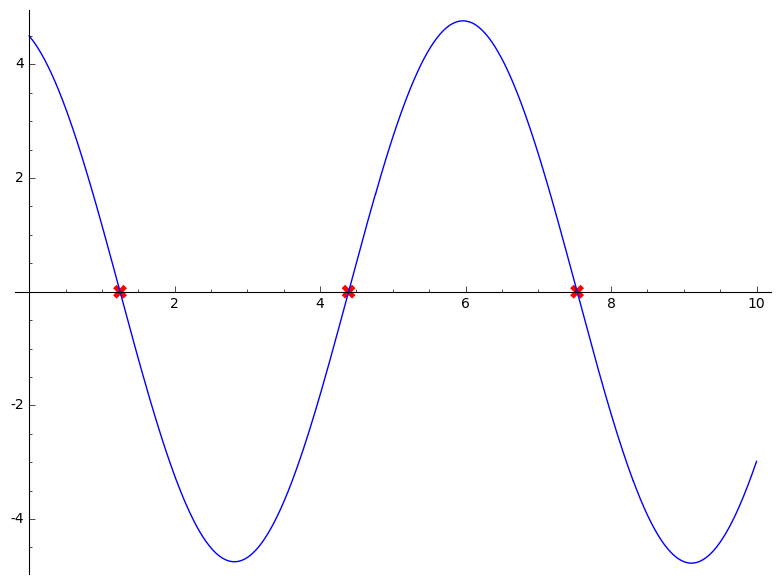

In [14]:
plot((lambda t: sln.sol(t)[0]), (0, 10))\
+ points(zip(sln.t_events[0], cycle([0])),
         color='red', marker='X', size=100)

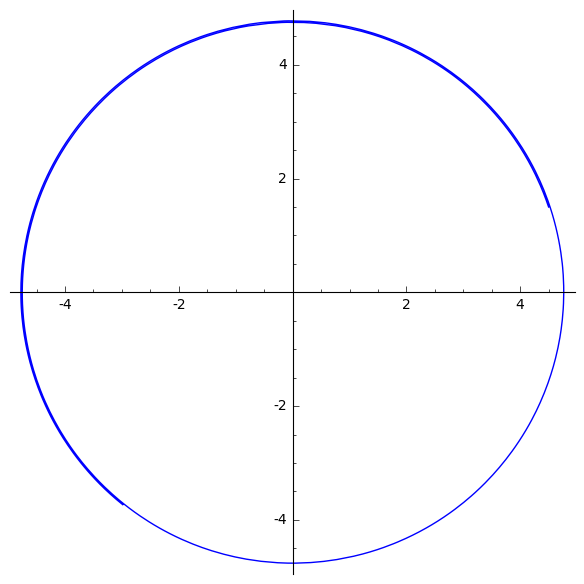

In [15]:
parametric_plot(((lambda t: sln.sol(t)[0]),
                 (lambda t: sln.sol(t)[1])),
                (0, 10))

In [16]:
load('lbuc.py')

In [17]:
Atomic(x - 3).numerical_signal_for_system(odes, y0, 10)

Signal([0.00000000000000000 .. 10.000000000000000], [([0.00000000000000000 .. 0.56458902188736560], True), ([0.56458902188736559 .. 5.0728223633526906], False), ([5.0728223633526905 .. 6.8526089639259010], True), ([6.8526089639259009 .. 10.000000000000000], False)])

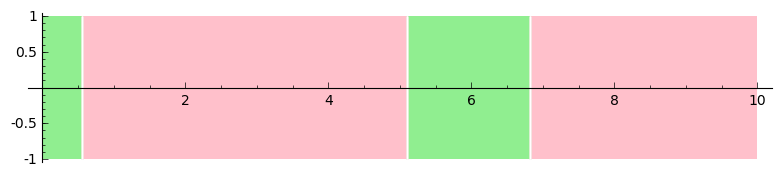

In [18]:
Atomic(x - 3).numerical_signal_for_system(odes, y0, 10).plot()

In [19]:
odes

(-y, x)

In [20]:
list(map(RIF, list(y0)))

[4.5000000000000000?, 1.5000000000000000?]

In [21]:
inter = RIF(-1e-3,1e-3)
#y01 = [RIF(4.5) + inter, RIF(1.5) + inter]
y01 = [RIF(4.5) + inter, RIF(1.5) + inter]

In [22]:
P = Atomic(x - 3.0)
reach = Reach(odes, y01, 10, order=10, step=0.1)
print(reach.res)
rs = reach.roots(x - 3.0, -y)
rs

2
verified contractive!
verified contractive!
verified contractive!


[0.564?, 5.075?, 6.848?]

In [23]:
P.dpdt(odes)

-y

Computed 100 flowpipes in 0.223366975784 sec
Prepared for plotting in 0.176862001419 sec
verified contractive!
verified contractive!
verified contractive!
roots = [0.564?, 5.075?, 6.848?]
  I  = [0.00000000000000000 .. 0.56393240821000846]
f(I) = [-0.00015203955216813725 .. 1.5010000000000022]
  I  = [0.56472073079642937 .. 5.0749927785478324]
f(I) = [-7.7675691814720374 .. 0.0078988760109286460]
  I  = [5.0757225303095294 .. 6.8471224360005439]
f(I) = [-0.0027030419825471164 .. 1.7650221611385027]
Monitored signal 0.273425102234 sec


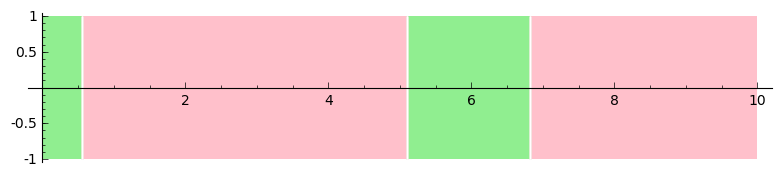

In [24]:
Atomic(x - 3.0).signal_for_system(odes, y01, 10).plot()

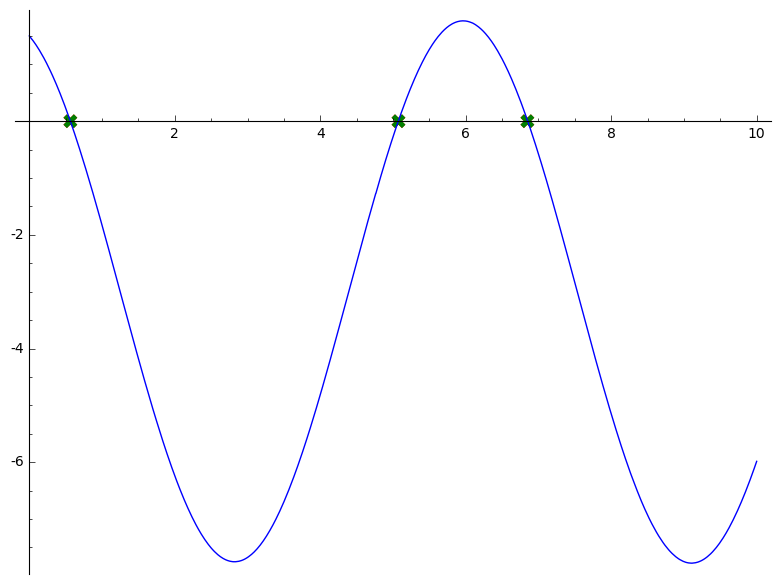

In [25]:
plot((lambda t: sln.sol(t)[0] - 3), (0, 10))\
 + points([(r.lower(), 0) for r in rs],
          color='red', marker='X', size=100)\
 + points([(r.upper(), 0) for r in rs],
          color='green', marker='X', size=100)#\
# + reach.sage_plot('x')

Computed 75 flowpipes in 0.163213968277 sec
Prepared for plotting in 0.123379945755 sec
verified contractive!
verified contractive!
verified contractive!
roots = [0.564?, 5.075?, 6.848?]
  I  = [0.00000000000000000 .. 0.56393240821000846]
f(I) = [-0.00015203955216813725 .. 1.5010000000000022]
  I  = [0.56472073079642937 .. 5.0749927785478324]
f(I) = [-7.7675691814720374 .. 0.0078988760109286460]
  I  = [5.0757225303095294 .. 6.8471224360005439]
f(I) = [-0.0027030419825471164 .. 1.7650221611385027]
Monitored signal 0.225457191467 sec


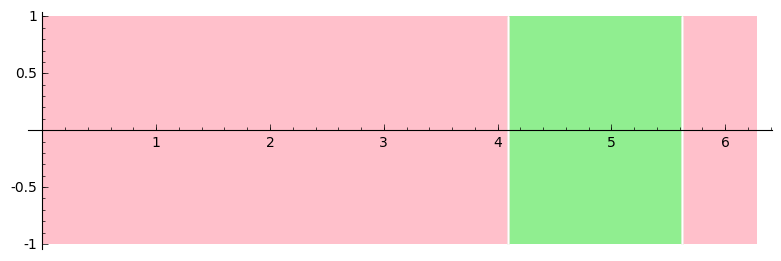

In [26]:
G(RIF(1,1.2), Atomic(x - 3)).signal_for_system(odes, y01, 2*pi).plot()

interval_signals.py:123: UserWarning: Inconsitient intervals [4.0728222341462183 .. 5.6526092220169764] (True) and [5.6526092220169754 .. 6.4831853071795873] (False) in signal!
  u.str(style='brackets'), bu))
interval_signals.py:123: UserWarning: Inconsitient intervals [4.0728222341462183 .. 5.6526092220169764] (True) and [5.6526092220169754 .. 6.2831853071795872] (False) in signal!
  u.str(style='brackets'), bu))


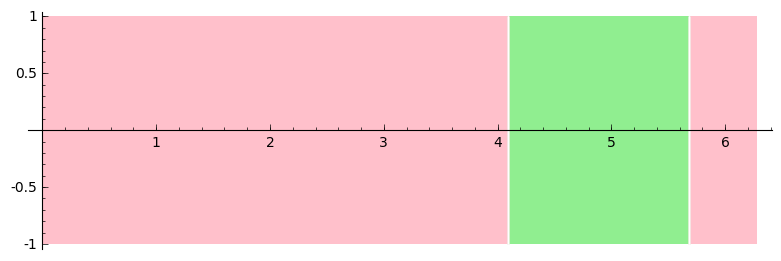

In [27]:
G(RIF(1,1.2), Atomic(x - 3)).numerical_signal_for_system(odes, y0, 2*pi).plot()

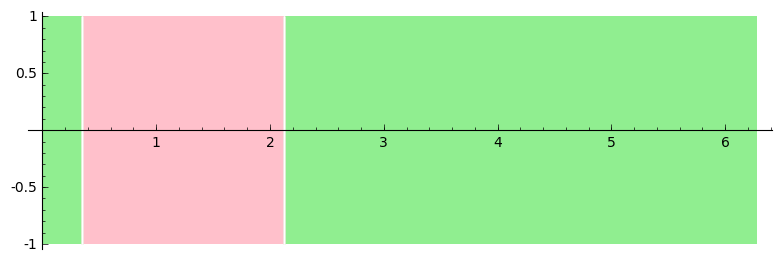

In [28]:
Atomic(3 - y).numerical_signal_for_system(odes, y0, 2*pi).plot()

Computed 63 flowpipes in 0.140866994858 sec
Prepared for plotting in 0.103219985962 sec
verified contractive!
verified contractive!
roots = [0.363?, 2.135?]
  I  = [0.00000000000000000 .. 0.36260584287121867]
f(I) = [-0.0055663014357953955 .. 1.5010000000000008]
  I  = [0.36333145431905650 .. 2.1347369731621360]
f(I) = [-1.7627437368777823 .. 0.0034503077647216607]
Monitored signal 0.14528298378 sec


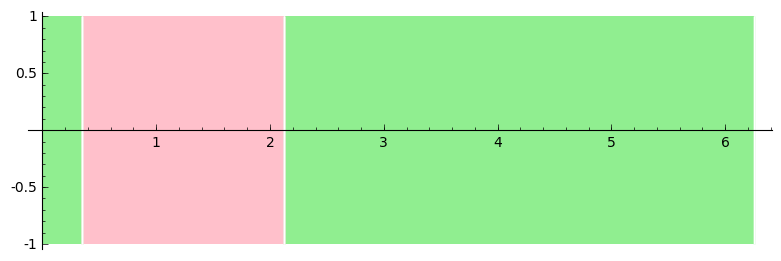

In [29]:
Atomic(3 - y).signal_for_system(odes, y01, 2*pi).plot()

Computed 103 flowpipes in 0.211855888367 sec
Prepared for plotting in 0.167587041855 sec
verified contractive!
verified contractive!
verified contractive!
verified contractive!
roots = [0.363?, 2.135?, 6.646?, 8.418?]
  I  = [0.00000000000000000 .. 0.36260584287121867]
f(I) = [-0.0055663014357953955 .. 1.5010000000000008]
  I  = [0.36333145431905650 .. 2.1347369731621360]
f(I) = [-1.7627437368777823 .. 0.0034503077647216607]
  I  = [2.1355088193305729 .. 6.6457940876200974]
f(I) = [-0.0030221070467963962 .. 7.7683288721205699]
  I  = [6.6465138239168446 .. 8.4179271026242191]
f(I) = [-1.7660184879904320 .. 0.0037477392343006067]
Monitored signal 0.27574300766 sec


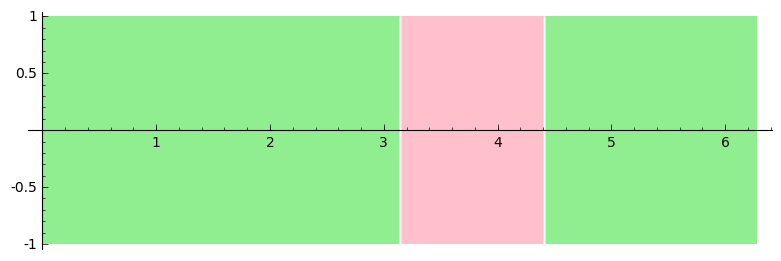

In [30]:
F(RIF(3.5,4), Atomic(3 - y)).signal_for_system(odes, y01, 2*pi).plot()

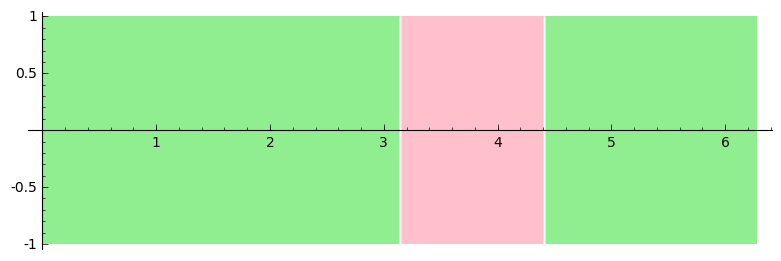

In [31]:
F(RIF(3.5,4), Atomic(3 - y)).numerical_signal_for_system(odes, y0, 2*pi).plot()

Computed 103 flowpipes in 0.215734004974 sec
Prepared for plotting in 0.177868843079 sec
verified contractive!
verified contractive!
verified contractive!
roots = [0.564?, 5.075?, 6.848?]
  I  = [0.00000000000000000 .. 0.56393240821000846]
f(I) = [-0.00015203955216813725 .. 1.5010000000000022]
  I  = [0.56472073079642937 .. 5.0749927785478324]
f(I) = [-7.7675691814720374 .. 0.0078988760109286460]
  I  = [5.0757225303095294 .. 6.8471224360005439]
f(I) = [-0.0027030419825471164 .. 1.7650221611385027]
verified contractive!
verified contractive!
verified contractive!
verified contractive!
roots = [0.363?, 2.135?, 6.646?, 8.418?]
  I  = [0.00000000000000000 .. 0.36260584287121867]
f(I) = [-0.0055663014357953955 .. 1.5010000000000008]
  I  = [0.36333145431905650 .. 2.1347369731621360]
f(I) = [-1.7627437368777823 .. 0.0034503077647216607]
  I  = [2.1355088193305729 .. 6.6457940876200974]
f(I) = [-0.0030221070467963962 .. 7.7683288721205699]
  I  = [6.6465138239168446 .. 8.4179271026242191]
f(

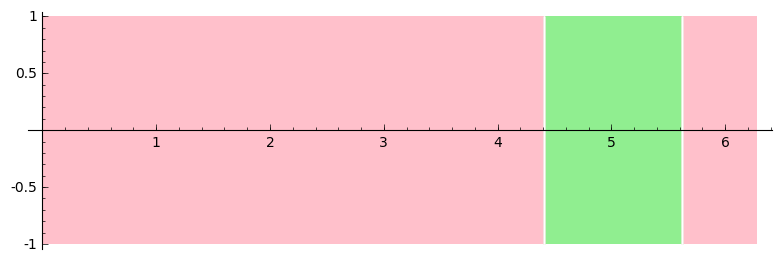

In [32]:
(G(RIF(1,1.2), Atomic(x - 3)) & F(RIF(3.5,4), Atomic(3 - y))).signal_for_system(odes, y01, 2*pi).plot()

interval_signals.py:123: UserWarning: Inconsitient intervals [4.0728223722879777 .. 5.6526089460790150] (True) and [5.6526089460790140 .. 9.2831853071795881] (False) in signal!
  u.str(style='brackets'), bu))
interval_signals.py:123: UserWarning: Inconsitient intervals [4.4245682451676380 .. 5.6526089460790150] (True) and [5.6526089460790140 .. 9.2831853071795881] (False) in signal!
  u.str(style='brackets'), bu))
interval_signals.py:123: UserWarning: Inconsitient intervals [4.4245682451676380 .. 5.6526089460790150] (True) and [5.6526089460790140 .. 6.2831853071795872] (False) in signal!
  u.str(style='brackets'), bu))


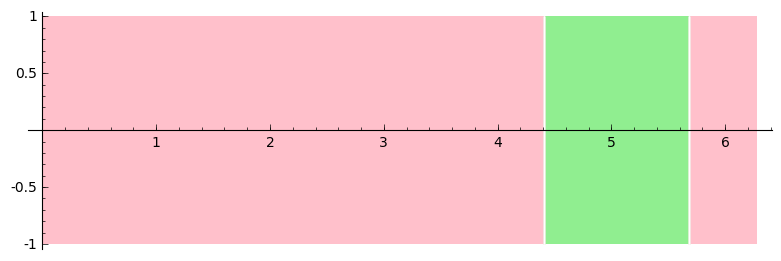

In [33]:
(G(RIF(1,1.2), Atomic(x - 3)) & F(RIF(3.5,4), Atomic(3 - y))).numerical_signal_for_system(odes, y0, 2*pi).plot()

## Real example: Welks and lobsters

In [34]:
us = [x,y]
k=RIF(0.8); b=RIF(0.6); c=RIF(0.3); e=RIF(0.05); f=RIF(2)
vf = vector([b*x*(RIF(1)-x) - c*x*(k-x)*y,
            -e*y*(RIF(1)+y)+f*x*(k-x)*y])
v0 = [RIF(0.5), RIF(2.0)]
v1 = [RIF(0.4), RIF(2.5)]
v2 = [RIF(1,1.2), RIF(4,6)]

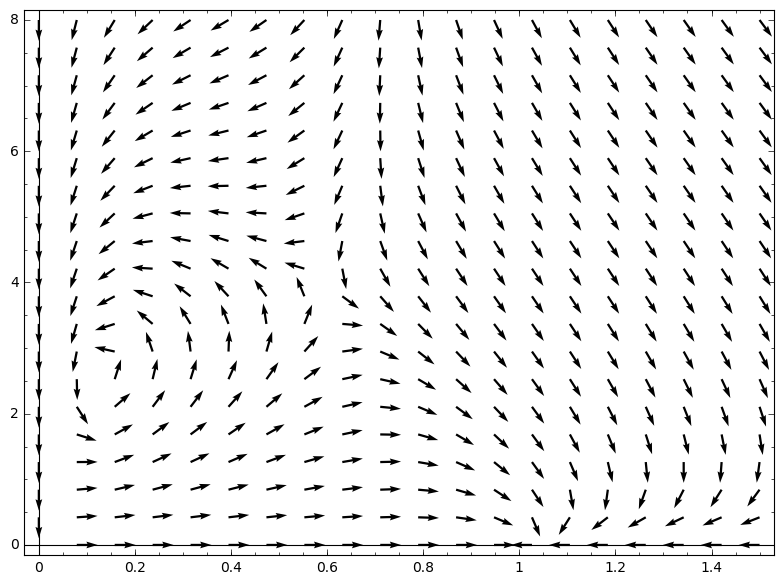

In [35]:
plot_vector_field((SR^2)(vf)/(SR^2)(vf).norm(),(x,0,1.5),(y,0,8))

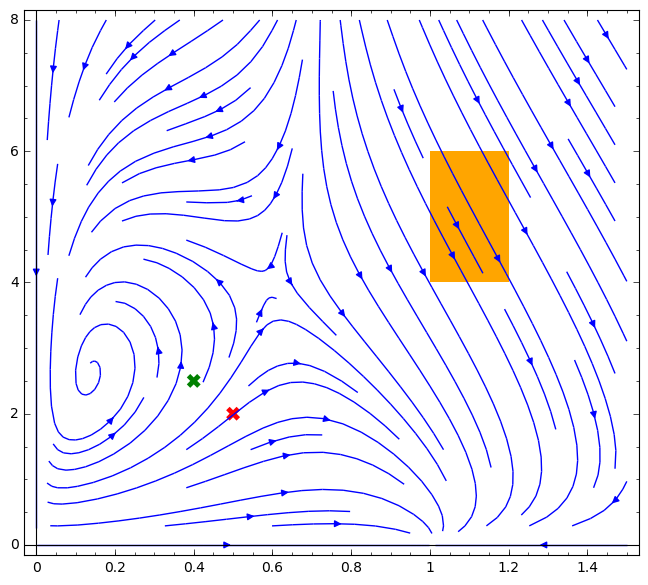

In [36]:
p = streamline_plot(tuple(vf),(x,0,1.5),(y,0,8))\
    + point(v0, size=100, marker='X', color='red')\
    + point(v1, size=100, marker='X', color='green')\
    + polygon([(v2[0].lower(), v2[1].lower()),
               (v2[0].lower(), v2[1].upper()),
               (v2[0].upper(), v2[1].upper()),
               (v2[0].upper(), v2[1].lower())],
              color='orange')
p.set_aspect_ratio(1/6)
p.show()

In [37]:
P = Atomic((x - 1)^2 + y^2 - 0.1)

In [38]:
sln = solve_ivp(vec_to_numpy(R, vf),
                (0, 20), v0,
                method='LSODA', vectorized=True,
                dense_output=True,
                events=(lambda _, (x, y): (x - 1)^2 + y - 0.1))
sln

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 76
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7fde170d7cd0>
   status: 0
  success: True
        t: array([ 0.        ,  0.20008999,  0.40017999,  0.9710477 ,  1.54191541,
        2.11278312,  3.20489744,  4.29701176,  4.97165901,  5.64630626,
        6.32095351,  6.99560076,  7.25083687,  7.50607298,  7.76130909,
        8.05625241,  8.35119574,  8.64613906,  9.19397061,  9.74180216,
       10.28963371, 10.83746525, 11.3852968 , 11.93312835, 12.4809599 ,
       13.02879145, 13.57662299, 14.12445454, 14.74703921, 15.36962389,
       15.99220856, 16.61479323, 17.23737791, 18.02353807, 18.80969823,
       19.59585839, 20.        ])
 t_events: [array([10.92388566])]
        y: array([[0.50000000000000000?, 0.511769892309286, 0.5233346774410491,
        0.5557746858867384, 0.5876674327854491, 0.6202755023375599,
        0.6897011122413346, 0.7776545022

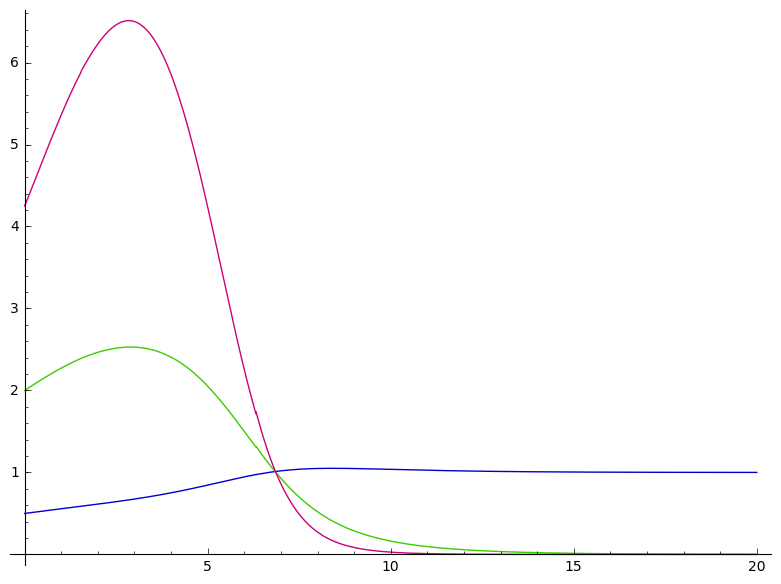

In [39]:
plot(((lambda t: sln.sol(t)[0]),
      (lambda t: sln.sol(t)[1]),
      (lambda t: (sln.sol(t)[0] - 1)^2 + sln.sol(t)[1]^2)),
     (0, 20))

In [40]:
W = QQ['x, y']

In [41]:
nvf = [sum(c.center()*W.gens()[0]^ex*W.gens()[1]^ey
     for c, (ex, ey) in zip(p.coefficients(), p.exponents())) for p in vf]
nvf

[0.300000000000000*x^2*y - 0.600000000000000*x^2 - 0.240000000000000*x*y + 0.600000000000000*x,
 -2.00000000000000*x^2*y + 1.60000000000000*x*y - 0.0500000000000000*y^2 - 0.0500000000000000*y]

In [42]:
nv0 = [v.center() for v in v0]
nv0

[0.500000000000000, 2.00000000000000]

In [43]:
#P.numerical_signal_for_system(nvf, v0, 20).plot()

Computed 200 flowpipes in 0.819276094437 sec
Prepared for plotting in 0.0542099475861 sec
verified contractive!
roots = [8.86?]
  I  = [0.00000000000000000 .. 8.8500769978751422]
f(I) = [-0.85344479842623700 .. 7.4241497834511004]
Monitored signal 0.0901799201965 sec


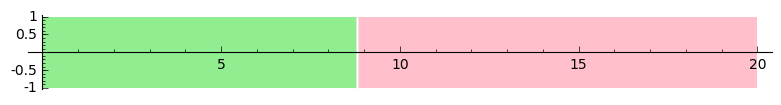

In [44]:
P.signal_for_system(vf, v0, 20, order=3, step=0.1).plot()

Computed 250 flowpipes in 1.23355484009 sec
Prepared for plotting in 0.0726959705353 sec
verified contractive!
roots = [8.86?]
  I  = [0.00000000000000000 .. 8.8500769978751422]
f(I) = [-0.85344479842623700 .. 7.4241497834511004]
Monitored signal 0.107809066772 sec


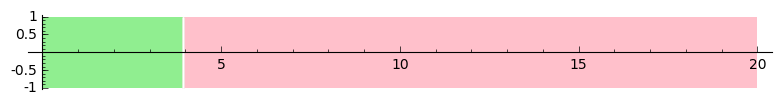

In [45]:
G(RIF(0, 5), P).signal_for_system(vf, v0, 20, order=3, step=0.1).plot()

Computed 400 flowpipes in 15.3086071014 sec
Prepared for plotting in 0.467555046082 sec
roots = []
Monitored signal 0.535532951355 sec


/usr/lib64/python2.7/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


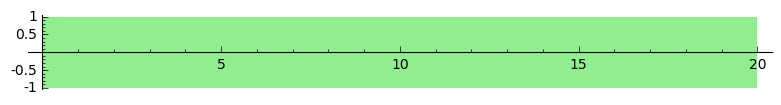

In [46]:
G(RIF(0, 20), P).signal_for_system(vf, v1, 20, order=10, step=0.1).plot()

In [47]:
reach = Reach(vf, v2, 20, order=5, step=0.01)

In [48]:
reach.prepare()

In [49]:
index_fn(P.p)(reach(RIF(3,4))).str(style='brackets')

'[-0.31874472771564611 .. 0.21103535262425855]'

Computed 2000 flowpipes in 48.0965528488 sec
Prepared for plotting in 80.8671250343 sec
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boun

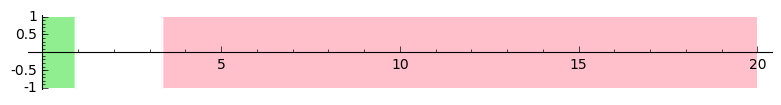

In [50]:
P.signal_for_system(vf, v2, 20, order=5, step=0.01).plot()

Computed 500 flowpipes in 5.47883605957 sec
Prepared for plotting in 3.06810903549 sec
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on bound

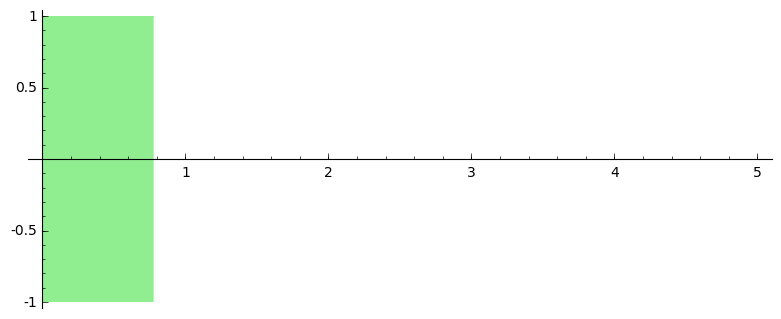

In [51]:
P.signal_for_system(vf, v2, 5, order=(3,20), step=0.01).plot()

Computed 147 flowpipes in 4.63982892036 sec
Prepared for plotting in 7.46357798576 sec
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on bound

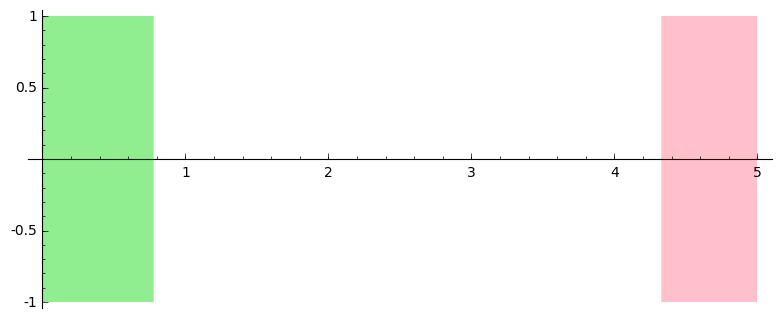

In [52]:
P.signal_for_system(vf, v2, 5, order=5, step=(0.001, 0.05),
                    precondition=1,
                    estimation=1e-3,
                    integrationScheme=2,
                    cutoff_threshold=1e-5).plot()

In [53]:
reach = Reach(
    vf,
    v2,
    5,
    step=(0.001, 0.05),
    order=5,
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5
)

In [54]:
reach.num_flowpipes

147

In [66]:
rs = reach.roots(P.p, P.dpdt(odes))
rs

root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on bo

[0.79?, 1.?e1]

In [67]:
rs[0].str(style='brackets')

'[0.78008130421818255 .. 0.78681602996822231]'

In [68]:
sig = P.signal_for_system(
    vf,
    v2,
    5,
    step=(0.001, 0.01),
    order=4,
    precondition=1,
    estimation=1e-4,
    integrationScheme=1,
    cutoff_threshold=1e-6
)

Computed 670 flowpipes in 10.4408609867 sec
Prepared for plotting in 14.9567968845 sec
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on bound

In [69]:
sig

Signal([0.00000000000000000 .. 5.0000000000000000], [([0.00000000000000000 .. 0.82388926351551762], True), ([3.9705961451099933 .. 3.9983633546183067], False), ([3.9985237845469603 .. 5.0000000000000000], False)])

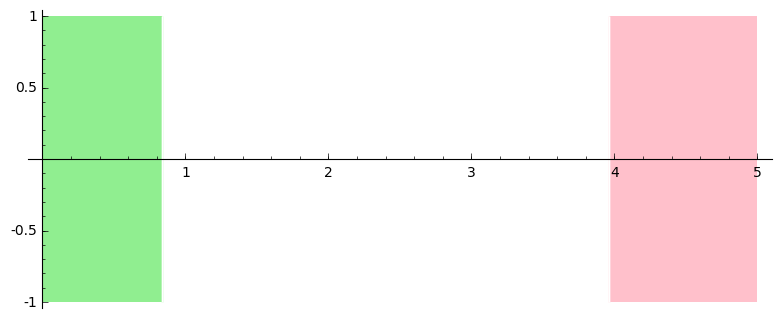

In [70]:
sig.plot()

In [71]:
K1 = RIF(0.83088524483822367, 0.83403490192890706)
reach(K1)

[2.?, 1.?e1]

In [72]:
index_fn(P.p)(reach(K1.center())).str(style='brackets')

'[-0.59192727705960691 .. 7.7299788185848648]'

In [73]:
K2 = RIF(0.82384410824369480,0.82707023662316004)
reach(K2)

[2.?, 1.?e1]

In [74]:
load('interval_signals.py')

In [75]:
index_fn(P.p)(reach(K2.center())).str(style='brackets')

'[-0.54681263853267970 .. 7.7638501845120214]'

In [77]:
signal_given_roots(lambda t: index_fn(P.p)(reach(t)), rs, RIF(0, 5))

roots = [0.79?, 1.?e1]
  I  = [0.00000000000000000 .. 0.78008130421818256]
f(I) = [-0.75664916624353574 .. 37.442306860062651]
  I  = [0.78681602996822230 .. 0.80147337423282828]
f(I) = [-0.58494254380095479 .. 8.5908320324052383]


Signal([0.00000000000000000 .. 5.0000000000000000], [([0.00000000000000000 .. 0.78008130421818256], True), ([0.78681602996822230 .. 0.80147337423282828], False), ([4.3404416667981298 .. 5.0000000000000000], False)])

Computed 500 flowpipes in 9.34537386894 sec
Prepared for plotting in 6.99460697174 sec
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on boundary!
root on bound

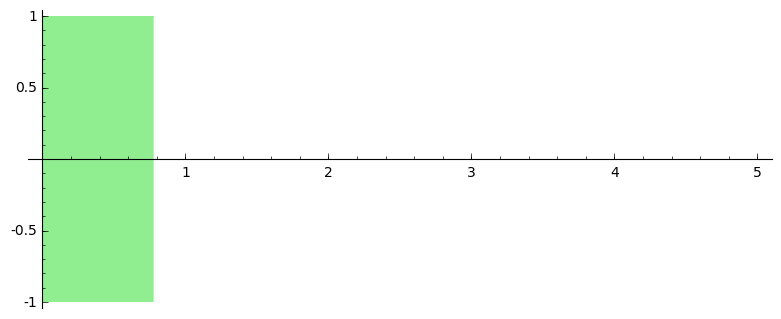

In [78]:
P.signal_for_system(vf, v2, 5, order=(3,20), step=0.01,
                    precondition=1,
                    estimation=1e-4,
                    integrationScheme=2,
                    cutoff_threshold=1e-5).plot()